In [3]:
import pandas as pd
import numpy as np

from tools import processed_path

# I need some quality tests here: 


- Filter ts that seem broken. 
- Check if there are any NaNs in the data exceeding the threshold
- Check for double timestamps.

 Removed columns should also be removed from the meta file later such that they are completely the same.

In [ ]:
data = pd.read_csv(processed_path +  "ts_ds.csv", index_col=0)

In [22]:
label = pd.read_csv(processed_path + "meta_joined.csv", index_col=0)

In [23]:
data = data.drop(columns=[x for x in data.columns if x not in label.index])

In [24]:
# Check if all labels are the same.
np.any(label.index.sort_values() == data.columns.sort_values())

True

In [25]:
# Check Nan Max. Shouldnt be higher than the threshold.
(data.isnull().sum() / len(data)).sort_values(ascending=False)[:40]

5891001_br     0.658269
572053_t       0.641846
572054_t       0.640551
572052_t       0.640420
24064003_ba    0.635622
421640_t       0.633152
24213101_ba    0.626746
594005_sa      0.599706
594010_sa      0.599694
594050_sa      0.599694
18005000_ba    0.599677
5874001_br     0.571371
5935203_br     0.566813
5891200_br     0.527970
572090_t       0.522043
049012_mv      0.485071
6952903_br     0.472789
560950_s       0.464996
24050009_ba    0.463005
574651_t       0.458584
574760_t       0.458579
576240_sa      0.410894
0495701_br     0.409570
0494101_br     0.408041
550290_s       0.403084
5930500_br     0.402091
5892209_br     0.400357
5890801_br     0.400334
5897001_br     0.400329
5890601_br     0.400329
5898601_br     0.400329
5956401_br     0.400329
5898302_br     0.400329
579001_sa      0.399804
579754_sa      0.399804
578630_sa      0.399804
555010_sa      0.399804
578220_sa      0.399804
16403001_ba    0.399787
11402809_ba    0.388617
dtype: float64

In [26]:
label["O"].unique()

array(['BSCV', 'MV', 'SA', 'T', 'BA', 'BR', 'S', 'B'], dtype=object)

In [27]:
check = (label.loc["5867900_b"],data["5867900_b"].copy())


### YOu can check the ts by hand here. I found only one that seems broken in thuringia.

<Axes: >

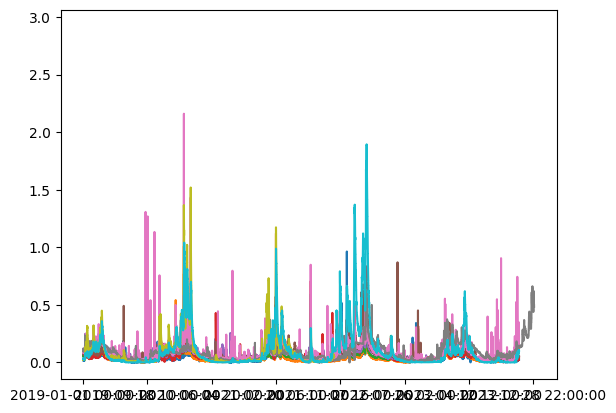

In [9]:
# again, seems okay.
data[data[[x for x in data.columns if "_mv" in x]].mean().sort_values()[:10].index].plot(legend=False)

<Axes: >

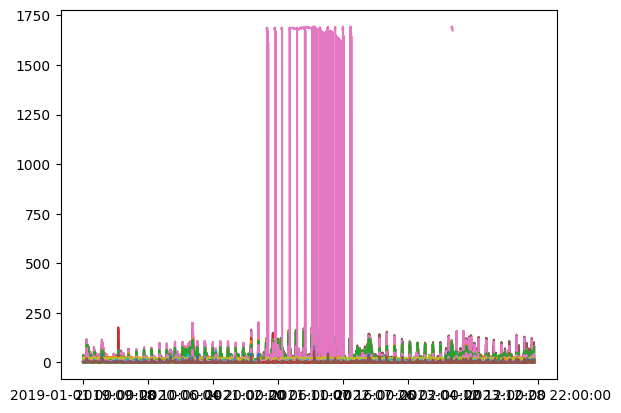

In [10]:
# clean
data[[x for x in data.columns if "_t" in x]].plot(legend=False)

<Axes: >

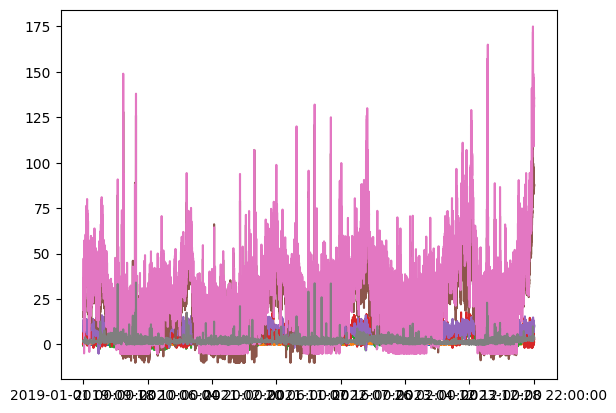

In [11]:
#looks wild but okay?
data[[x for x in data.columns if  x[-2:] == "_b"]].plot(legend=False)

### Drop T id and final prep

In [28]:
to_drop  = "572090_t"


data.drop(to_drop, axis=1, inplace=True)
label.drop(to_drop, axis=0, inplace=True)

In [29]:
# Check if all labels are the same.
np.any(label.index.sort_values() == data.columns.sort_values())

True

In [30]:
# Check if we can savely drop the origin label part. 
len(set([x.split("_")[0] for x in data.columns])) == len(data.columns)

True

In [31]:
label["original_id"] = [x.split("_")[0] for x in label.index]
label["original_id"] = "id_" + label["original_id"]
# keep to prevent conversion to int and consecutive drop of leading 0.

In [32]:
# Some indices are annoying as they start with 0 which is dropped when accidentally converted to int index. 
len([x for x in data.columns if  x[0] == "0" in x])

64

In [33]:
label.sort_values(["R", "H"], ascending=True, inplace=True)

# sort same way.
data = data[label.index]

label.reset_index(drop=True, inplace=True)

data.columns = label.index


In [34]:
check[0]

R     Nordgraben
X      52.594163
Y      13.288869
D            1.3
H          31.54
QD             0
QH             0
QX             0
QY             0
QR             0
O              B
Name: 5867900_b, dtype: object

In [35]:
label[label["original_id"] == "id_" + check[0].name.split("_")[0]] == check[0]

/tmp/ipykernel_1284097/3600130926.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  label[label["original_id"] == "id_" + check[0].name.split("_")[0]] == check[0]


,D,H,O,QD,QH,QR,QX,QY,R,X,Y,original_id
573,True,True,True,True,True,True,True,True,True,True,True,False


In [36]:
# transform didnt shuffle anything.
data[573] == check[1]

2019-01-01 00:00:00     True
2019-01-01 00:15:00     True
2019-01-01 00:30:00     True
2019-01-01 00:45:00     True
2019-01-01 01:00:00     True
                       ...  
2023-12-31 22:45:00    False
2023-12-31 23:00:00    False
2023-12-31 23:15:00    False
2023-12-31 23:30:00    False
2023-12-31 23:45:00    False
Length: 175296, dtype: bool

In [39]:
# Save new data file: 

data.to_csv("/home/datasets4/stein/rivers/processed/ts_ds_final.csv")

In [41]:
label.index.name = "ID"

In [42]:
label.to_csv("/home/datasets4/stein/rivers/processed/" + "meta_joined_final.csv")

In [43]:
label.loc[552]

R              Mühlgraben
X               54.318436
Y                13.04859
D                     NaN
H                   2.983
QD                     -1
QH                      0
QX                      0
QY                      0
QR                      0
O                      MV
original_id     id_045813
Name: 552, dtype: object

In [44]:
label.loc[label["original_id"] == "id_" + "5874100", "R"]

ID
936    Temnitz
Name: R, dtype: object